<a href="https://colab.research.google.com/github/yumi9647/Deep-Learning-with-Python/blob/master/Chapter_2_Mathematical_components_of_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import mnist

Using TensorFlow backend.


In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
len(train_labels)

60000

In [0]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [0]:
test_images.shape

(10000, 28, 28)

In [0]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [0]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation = 'relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation = 'softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
network.compile(optimizer='rmsprop', 
                loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

In [0]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32')/255

In [0]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [0]:
network.fit(train_images, train_labels, epochs = 5, batch_size = 128)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 5s 90us/step - loss: 1.4837 - acc: 0.6626
Epoch 2/5
60000/60000 [==============================] - 5s 85us/step - loss: 0.5884 - acc: 0.8548
Epoch 3/5
60000/60000 [==============================] - 6s 94us/step - loss: 0.4114 - acc: 0.8883
Epoch 4/5
60000/60000 [==============================] - 6s 95us/step - loss: 0.3537 - acc: 0.9007
Epoch 5/5
60000/60000 [==============================] - 6s 97us/step - loss: 0.3241 - acc: 0.9079


In [0]:
test_loss, test_acc = network.evaluate(test_images,test_labels)

10000/10000 [==============================] - 1s 50us/step


In [0]:
print('test_acc:', test_acc)

test_acc: 0.818


what is a tensor?

(여기서의 차원은 축을 의미)

scalar: 0차원 텐서 (float32 또는 float64)

vector: 1차원 텐서 

matrix: 2차원 텐서

In [0]:
import numpy as np

scalar = np.array(12)
vector = np.array([1,2,3])
matrix = np.array([
    [1,2,3,4],
    [3,3,4,5],
    [3,4,4,5]
])
tensor = np.array([
    [
        [1,2,3],
        [2,3,4]
    ],
    [
    [2,3,4],
    [3,3,5]
    ]
])

In [0]:
tensor.ndim

3

In [0]:
print(train_images.ndim) #위에서 reshape 했기 때문에 2차원 텐서(행렬))

2


In [0]:
train_images.shape

(60000, 784)

In [0]:
print(train_images.dtype)

float32


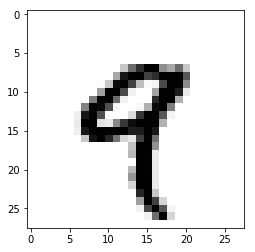

In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
digit = train_images[4]


import matplotlib.pyplot as plt
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

In [0]:
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


In [0]:
my_slice = train_images[10:100,:,:]
my_slice.shape

(90, 28, 28)

In [0]:
my_slice = train_images[:, 7:-7, 7:-7]

In [0]:
def naive_relu(x):
    assert len(x.shape) ==2 #2d numpuy 배열인지 확인

    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] = max(x[i,j], 0)
    
    return x

    

In [0]:
def naive_add(x, y):
    assert len(x.shape)==2
    assert x.shape == y.shape
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] += y[i,j]
    >
    
    return x


In [0]:
x = np.random.random((64,3,32,10))
y = np.random.random((32,10))

z = np.maximum(x,y)

In [0]:
def naive_vector_dot(x,y):
    assert len(x.shape) ==1
    assert len(y.shape) ==1
    assert x.shape[0] == y.shape[0]
    
    z = 0
    for i in range(x.shape[0]):
        z += x[i]*y[i]
       
    
    return z

In [0]:
def naive_matrix_vector_dot(x,y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0] #dimension 조건
    
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i,j]*y[j]
    return z

In [0]:
def naive_matrix_vector_dot(x,y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i,:], y) # x 행렬 각 행의 모든 원소와 y 의 dot product
    return z

In [0]:
# 두 행렬 간의 dot product

def naive_matrix_vector_dot(x,y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0] #dimension 조건
    
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i,:]
            column_y = y[:,j]
            z[i,j] = naive_vector_dot(row_x, column_y)
    
    return z

텐서 크기 변환

In [0]:
x = np.array([[0., 1.],
             [2., 3.],
             [4.,5.]
             ])
print(x.shape)

(3, 2)


In [0]:
x = x.reshape((6,1))

In [0]:
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [0]:
x = x.reshape((2,3))

In [0]:
x

array([[0., 1., 2.],
       [3., 4., 5.]])

In [0]:
x = np.zeros((300,20))
x = np.transpose(x)
print(x.shape)

(20, 300)
